## Credit card Segmentaion problem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (11.0, 6.0)

In [2]:
# reading data into dataframe
credit= pd.read_csv("datasets_14701_19663_CC GENERAL.csv")

In [3]:
# setting notebooks to show all rows and columns
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

In [4]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
credit.shape

(8950, 18)

In [7]:
# Descriptive stats
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([(x.isnull().sum()/len(x))*100, x.dtype, len(x.dropna().unique()), len(x), x.count(), x.isnull().sum(), x.sum(), x.dropna().mean(), x.dropna().median(),  x.dropna().std(), x.dropna().var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max(), (x.dropna().quantile(0.75) - x.dropna().quantile(0.25)), (x.dropna().mean()+3*(x.dropna().std())), (x.dropna().mean()-3*(x.dropna().std())), (x.dropna().quantile(0.25)-(1.5*(x.dropna().quantile(0.75) - x.dropna().quantile(0.25)))), (x.dropna().quantile(0.75)+(1.5*(x.dropna().quantile(0.75) - x.dropna().quantile(0.25)))), ((x.max() > x.dropna().mean()+3*x.dropna().std()) | (x.min() < x.dropna().mean()-3*x.dropna().std())), ((x.max() > x.dropna().quantile(0.75)+(1.5*(x.dropna().quantile(0.75) - x.dropna().quantile(0.25)))) | (x.min() < x.dropna().quantile(0.25)-(1.5*(x.dropna().quantile(0.75) - x.dropna().quantile(0.25)))))] ,
                  index=['NMISS%', 'D-type', 'unique', 'Length', 'N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10(Q1)' ,'P25' ,'P50(Q2)', 'P75(Q3)' ,'P90' ,'P95' ,'P99' ,'MAX', 'IQR', '+3std', '-3std', 'lowerB', 'upperB', 'outlier 1', 'outlier 2'])

credit.select_dtypes(include = np.number).apply(lambda x: var_summary(x)).T

,NMISS%,D-type,unique,Length,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10(Q1),P25,P50(Q2),P75(Q3),P90,P95,P99,MAX,IQR,+3std,-3std,lowerB,upperB,outlier 1,outlier 2
BALANCE,0,float64,8871,8950,8950,0,1.4002e+07,1564.47,873.385,2081.53,4.33277e+06,0,0.0651006,8.81452,23.5755,128.282,873.385,2054.14,4338.56,5909.11,9338.8,19043.1,1925.86,7809.07,-4680.12,-2760.51,4942.93,True,True
BALANCE_FREQUENCY,0,float64,43,8950,8950,0,7851.57,0.877271,1,0.236904,0.0561235,0,0.090909,0.272727,0.454545,0.888889,1,1,1,1,1,1,0.111111,1.58798,0.166559,0.722222,1.16667,True,True
PURCHASES,0,float64,6203,8950,8950,0,8.97868e+06,1003.2,361.28,2136.63,4.56521e+06,0,0,0,0,39.635,361.28,1110.13,2542.62,3998.62,8977.29,49039.6,1070.5,7413.11,-5406.7,-1566.11,2715.87,True,True
ONEOFF_PURCHASES,0,float64,4014,8950,8950,0,5.30231e+06,592.437,38,1659.89,2.75523e+06,0,0,0,0,0,38,577.405,1600.1,2671.09,6689.9,40761.2,577.405,5572.1,-4387.23,-866.108,1443.51,True,True
INSTALLMENTS_PURCHASES,0,float64,4452,8950,8950,0,3.67906e+06,411.068,89,904.338,817827,0,0,0,0,0,89,468.637,1140.07,1750.09,3886.24,22500,468.637,3124.08,-2301.95,-702.956,1171.59,True,True
CASH_ADVANCE,0,float64,4323,8950,8950,0,8.7609e+06,978.871,0,2097.16,4.3981e+06,0,0,0,0,0,0,1113.82,3065.53,4647.17,9588.16,47137.2,1113.82,7270.36,-5312.62,-1670.73,2784.55,True,True
PURCHASES_FREQUENCY,0,float64,47,8950,8950,0,4388.64,0.490351,0.5,0.401371,0.161098,0,0,0,0,0.083333,0.5,0.916667,1,1,1,1,0.833334,1.69446,-0.713762,-1.16667,2.16667,False,False
ONEOFF_PURCHASES_FREQUENCY,0,float64,47,8950,8950,0,1812,0.202458,0.083333,0.298336,0.0890044,0,0,0,0,0,0.083333,0.3,0.75,1,1,1,0.3,1.09747,-0.692551,-0.45,0.75,False,True
PURCHASES_INSTALLMENTS_FREQUENCY,0,float64,47,8950,8950,0,3261.71,0.364437,0.166667,0.397448,0.157965,0,0,0,0,0,0.166667,0.75,1,1,1,1,0.75,1.55678,-0.827906,-1.125,1.875,False,False
CASH_ADVANCE_FREQUENCY,0,float64,54,8950,8950,0,1209.54,0.135144,0,0.200121,0.0400486,0,0,0,0,0,0,0.222222,0.416667,0.583333,0.833333,1.5,0.222222,0.735508,-0.46522,-0.333333,0.555555,True,True


---

# a) Missing Value Treatment
       - Since there are missing values in the data so we are imputing them with median.

---

In [8]:
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)

credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)

# Deriving New KPI
##  1. Monthly_avg_purchase
$$\frac{purchases}{tenure}$$

In [9]:
credit['Monthly_avg_purchase'] = credit['PURCHASES']/credit['TENURE']

##  2. Monthly_cash_advance
$$\frac{CASH\ ADVANCE}{tenure}$$

In [10]:
credit['Monthly_cash_advance'] = credit['CASH_ADVANCE']/credit['TENURE']

##  3. Purchase_type 
- To find what type of purchases customers are making on credit card
- 4 cases
  - One-off = 0; installments = 0
  - One-off != 0; installments = 0
  - One-off = 0; installments != 0
  - One-off != 0; installments != 0

In [11]:
def purchase(credit):
    
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'no_purchases'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [12]:
credit['purchase_type'] = credit.apply(purchase,axis=1)

## 4. Average amount per purchase
- No need already present PURCHASES_TRX

## 5. Average cash advance transaction
- No need already present CASH_ADVANCE_TRX

## 6. Limit_usage (shows credit-score ) credit card utilization
   - Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [13]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

## 7. Payment to minimum payment ratio

In [14]:
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

# Outlier Treatments
- Since there are variables having extreme values, I am doing log-transformation on the dataset to remove outlier effect 

In [15]:
def uni_variate(col):
    plt.figure()
    sns.boxplot(x = col)

C:\Users\AKSHAY\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


BALANCE                             None
BALANCE_FREQUENCY                   None
PURCHASES                           None
ONEOFF_PURCHASES                    None
INSTALLMENTS_PURCHASES              None
CASH_ADVANCE                        None
PURCHASES_FREQUENCY                 None
ONEOFF_PURCHASES_FREQUENCY          None
PURCHASES_INSTALLMENTS_FREQUENCY    None
CASH_ADVANCE_FREQUENCY              None
CASH_ADVANCE_TRX                    None
PURCHASES_TRX                       None
CREDIT_LIMIT                        None
PAYMENTS                            None
MINIMUM_PAYMENTS                    None
PRC_FULL_PAYMENT                    None
TENURE                              None
Monthly_avg_purchase                None
Monthly_cash_advance                None
limit_usage                         None
payment_minpay                      None
dtype: object

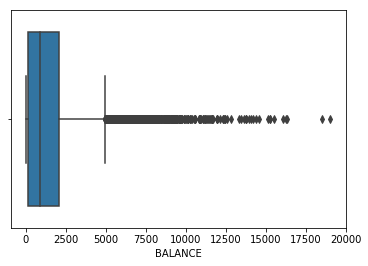

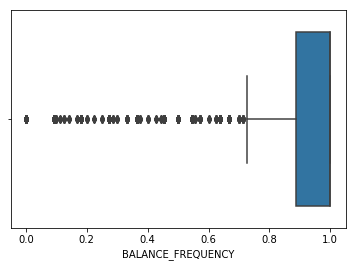

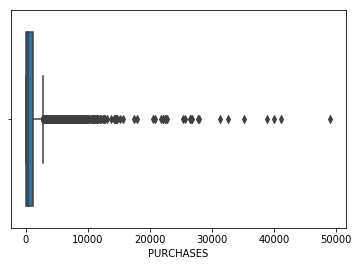

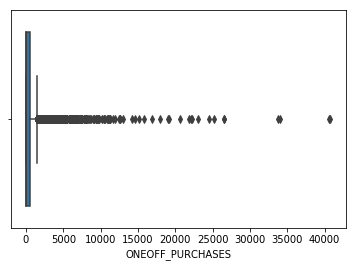

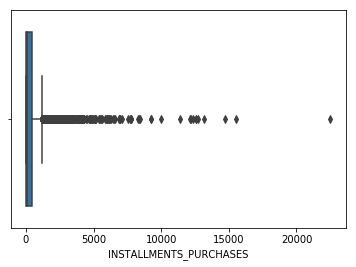

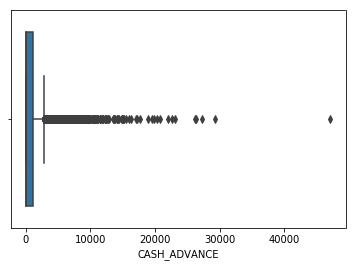

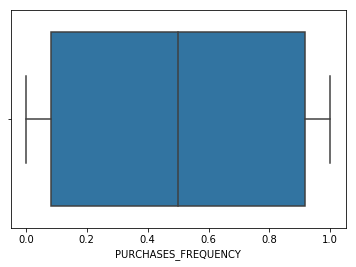

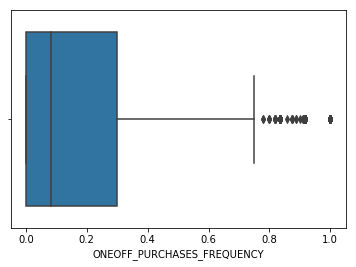

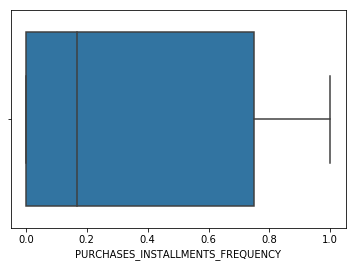

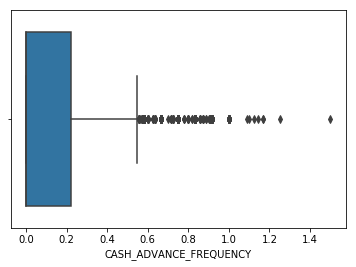

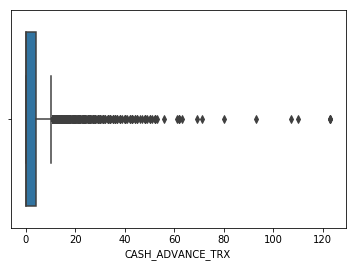

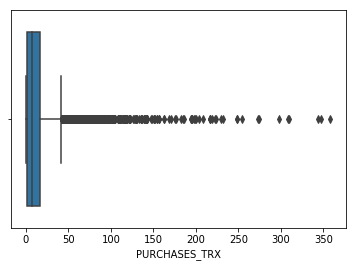

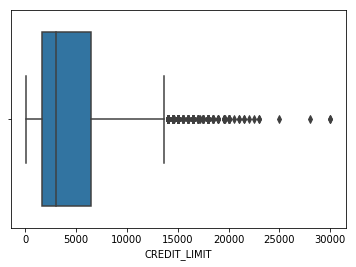

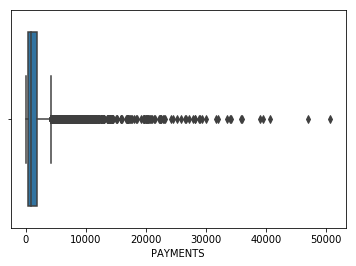

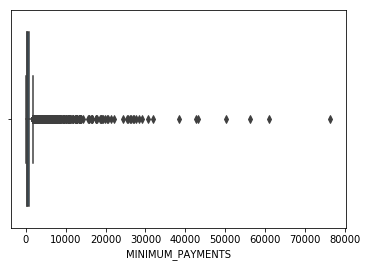

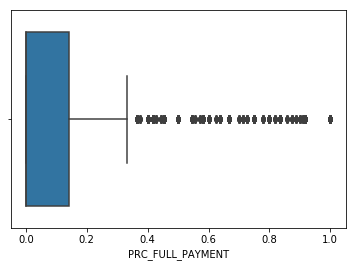

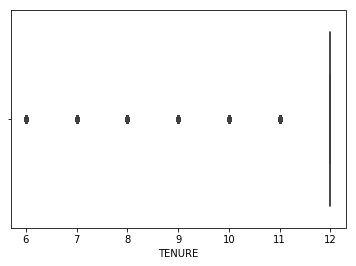

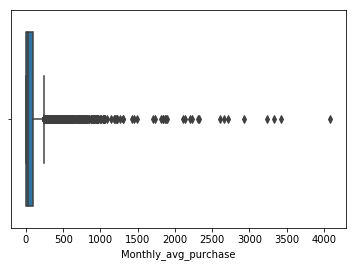

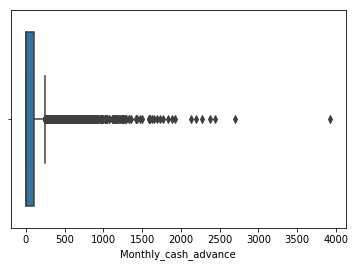

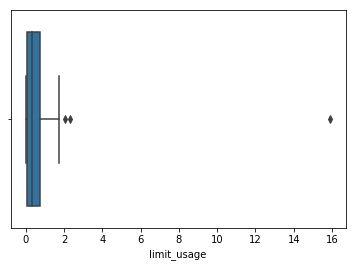

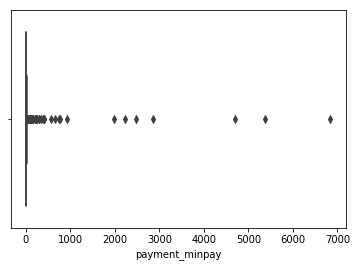

In [16]:
credit.drop(['CUST_ID', 'purchase_type'], axis = 1).apply(uni_variate, axis = 0 )

In [17]:
# log tranformation
cr_log = credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [18]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [19]:
col = ['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre = cr_log[[x for x in cr_log.columns if x not in col ]]

In [20]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [21]:
cr_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

---

# Insights from new KPIs

---

In [22]:
# Average payment_minpayment ratio for each purchse type.
x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

C:\Users\AKSHAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  


Text(0.5,1,'Mean payment_minpayment ratio for each purchse type')

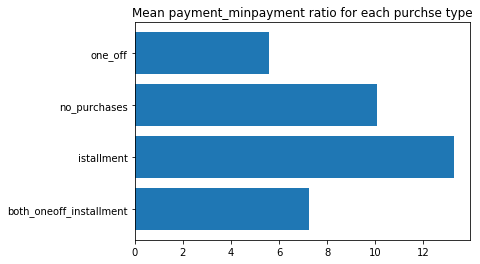

In [23]:
fig,ax = plt.subplots()
ax.barh(bottom=range(len(x)),width=x.values)
ax.set(yticks= np.arange(len(x)),yticklabels=x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

**Installment has big mean minimum payment due (or in other words Installment has less payment dues or customers with installment purchases are paying dues )**

Text(0.5,1,'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

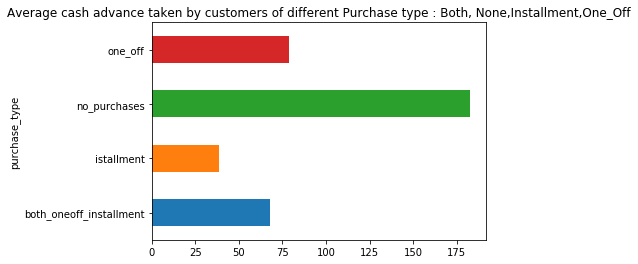

In [24]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

**Customers who don't do either one-off or installment purchases take more cash on advance**

In [25]:
credit.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_avg_purchase', 'Monthly_cash_advance', 'purchase_type',
       'limit_usage', 'payment_minpay'],
      dtype='object')

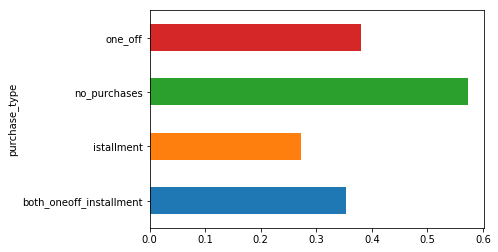

In [26]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

**Customers with installment purchases have good credit score**

In [27]:
# Original dataset with categorical column converted to number type.
cre_original = pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

******
# c) Preparing for Machine learning
******

In [28]:
# creating Dummies for categorical variable
cr_pre['purchase_type'] = credit.loc[:,'purchase_type']
#pd.get_dummies(cr_pre['purchase_type'])

C:\Users\AKSHAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'], drop_first = True)],axis=1)

In [30]:
l=['purchase_type']

In [31]:
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
istallment                          False
no_purchases                        False
one_off                             False
dtype: bool

In [32]:
cr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
BALANCE_FREQUENCY                   8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
Monthly_avg_purchase                8950 non-null float64
Monthly_cash_advance                8950 non-null float64
limit_usage                         8950 non-null float64
payment_minpay                      8950 non-null float64
istallment                          8950 non-null uint8
no_purchases                        8950 non-null uint8
one_off                    

In [33]:
cr_dummy.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,istallment,no_purchases,one_off
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600,0.252514,0.228156,0.209385
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817,0.000000,0.000000,0.000000
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459,0.000000,0.000000,0.000000
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415,1.000000,0.000000,0.000000
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767,1.000000,1.000000,1.000000


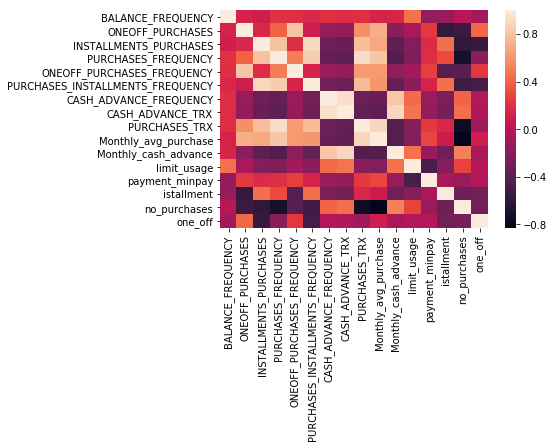

In [34]:
sns.heatmap(cr_dummy.corr())

<big>
- Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
</big>


- Before applying PCA we will standardize data  to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

# d). Standardrizing data 
- To put data on the same scale 

In [35]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
cr_scaled=sc.fit_transform(cr_dummy)

# e) Applying PCA 

In [36]:
from sklearn.decomposition import PCA
pc = PCA(n_components = None)
pc.fit_transform(cr_scaled)
np.cumsum(np.round(pc.explained_variance_ratio_, 4)*100)

array([ 40.53,  58.52,  73.82,  82.12,  88.17,  91.96,  94.3 ,  96.14,
        97.4 ,  98.42,  98.94,  99.26,  99.53,  99.79,  99.97, 100.  ])

### Let's take 5 variables to capture 88% of vaiance

In [37]:
pca = PCA(n_components=5)
p=pca.fit(cr_scaled)

In [38]:
p.explained_variance_

array([6.48582243, 2.87808524, 2.4482912 , 1.32779098, 0.96790757])

In [39]:
cr_scaled.shape

(8950, 16)

# Skre plot

In [40]:
var_ratio = np.cumsum(np.round(pc.explained_variance_ratio_, 4)*100)

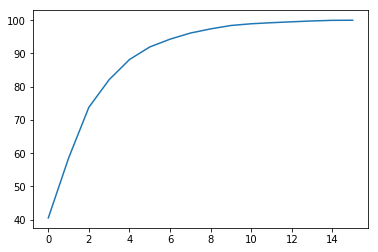

In [41]:
pd.Series(var_ratio).plot()

In [42]:
np.round(p.explained_variance_ratio_, 3)

array([0.405, 0.18 , 0.153, 0.083, 0.06 ])

In [43]:
np.cumsum(np.round(p.explained_variance_ratio_, 4)*100)

array([40.53, 58.52, 73.82, 82.12, 88.17])

---
# Since 5 components are explaining about 88% variance so we select 5 components

---



In [44]:
pc_final = PCA(n_components=5).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [45]:
dd=pd.DataFrame(reduced_cr)

In [46]:
dd.head()

,0,1,2,3,4
0,-0.053415,-2.541138,-0.846281,-0.553622,0.384174
1,3.949706,-0.252853,0.364938,0.848987,-0.804588
2,-1.467559,2.460172,-2.002269,-1.592986,-0.070866
3,0.897066,1.303191,-2.186251,-1.128738,1.535674
4,1.269821,0.365431,-2.199121,-1.789728,-0.058239


In [47]:
dd.shape

(8950, 5)

In [48]:
col_list=cr_dummy.columns

In [49]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay', 'istallment',
       'no_purchases', 'one_off'],
      dtype='object')

In [50]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,-0.018763,0.209195,0.334469,-0.342568,-0.350153
ONEOFF_PURCHASES,-0.199613,0.469028,-0.134969,0.017221,-0.040379
INSTALLMENTS_PURCHASES,-0.315505,-0.141006,0.299319,0.097139,-0.028376
PURCHASES_FREQUENCY,-0.354004,0.030029,0.199018,-0.003366,0.040387
ONEOFF_PURCHASES_FREQUENCY,-0.204501,0.418138,-0.063142,0.067428,-0.189208
PURCHASES_INSTALLMENTS_FREQUENCY,-0.302327,-0.149114,0.318831,0.052680,-0.028022
CASH_ADVANCE_FREQUENCY,0.235830,0.219422,0.334910,0.217042,0.294695
CASH_ADVANCE_TRX,0.252143,0.220386,0.339865,0.215701,0.269305
PURCHASES_TRX,-0.359073,0.130397,0.157758,0.013535,0.037349
Monthly_avg_purchase,-0.350625,0.193362,0.043876,0.006508,0.157563


In [51]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.405319
PC_1    0.179860
PC_2    0.153001
PC_3    0.082978
PC_4    0.060487
dtype: float64

# f). Clustering 

---
<big>

I am starting with 4 clusters.

</big>

---

Text(0,0.5,'Error Rate')

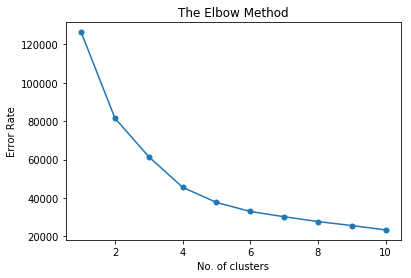

In [52]:
from sklearn.cluster import KMeans
error_rate = []
for i in range(1, 11):
    k_clust = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    k_clust.fit(reduced_cr)
    error_rate.append(k_clust.inertia_)
plt.plot(range(1, 11), error_rate, marker = 'o', markersize = 5)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('Error Rate')

In [53]:
from sklearn.cluster import KMeans
km_4 = KMeans(n_clusters=4, random_state=123)
km_4.fit(reduced_cr)
km_4.labels_

array([0, 2, 1, ..., 0, 2, 1])

In [54]:
pd.Series(km_4.labels_).value_counts()

3    2614
0    2304
2    2103
1    1929
dtype: int64

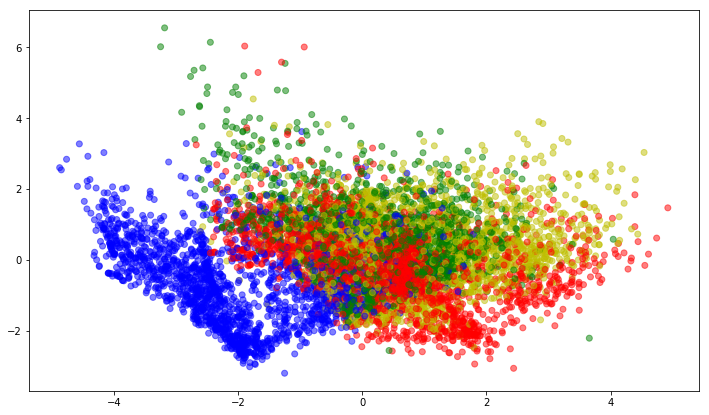

In [55]:
color_map = {0:'r',1:'b',2:'g',3:'y',4:'k'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(12,7))
plt.scatter(reduced_cr[:,2],reduced_cr[:,3],c=label_color,cmap='Spectral',alpha=0.5)

In [56]:
cr_dummy.dtypes

BALANCE_FREQUENCY                   float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
Monthly_avg_purchase                float64
Monthly_cash_advance                float64
limit_usage                         float64
payment_minpay                      float64
istallment                            uint8
no_purchases                          uint8
one_off                               uint8
dtype: object

In [57]:
df_pair_plot = pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(5)])

In [58]:
df_pair_plot['Cluster']=km_4.labels_

C:\Users\AKSHAY\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\AKSHAY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\AKSHAY\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\AKSHAY\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


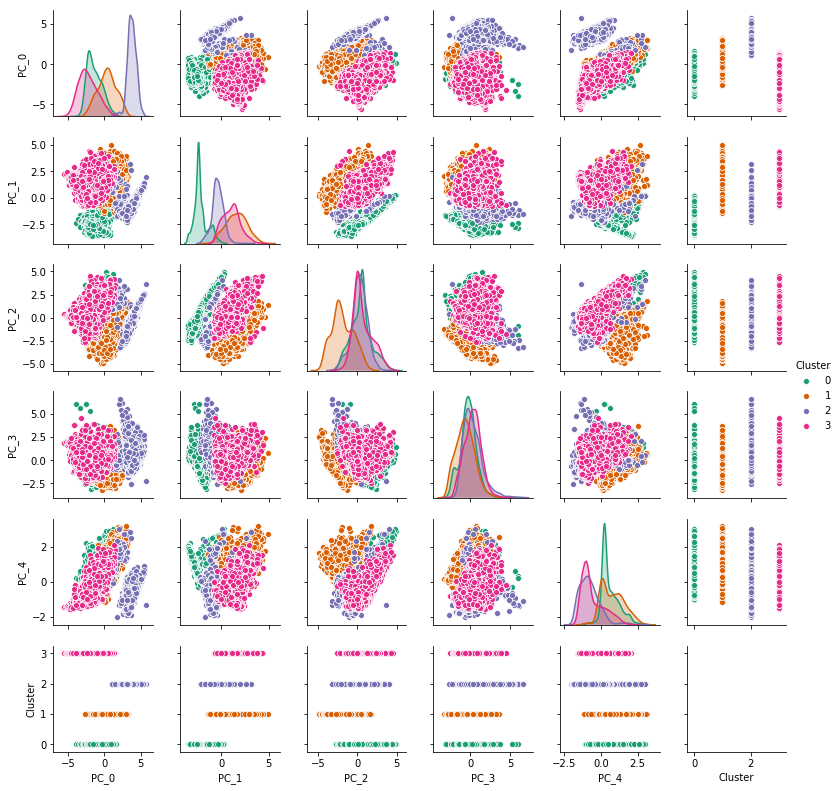

In [59]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

## It shows that first two components are able to indentify clusters

In [60]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','istallment','one_off','no_purchases','CREDIT_LIMIT']

In [61]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [62]:
cre_original.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay,both_oneoff_installment,istallment,no_purchases,one_off
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,istallment,0.040901,1.446508,0,1,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,no_purchases,0.457495,3.826241,0,0,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687,0.991682,0,0,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off,0.222223,0.000000,0,0,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429,2.771075,0,0,0,1


In [63]:
# Conactenating labels found through Kmeans with data 
cluster_df_4 = pd.concat([cre_original[col_kpi], pd.Series(km_4.labels_, name='Cluster_4')],axis=1)

In [64]:
cluster_df_4.head()
#cluster_df_4[cluster_df_4['Cluster_4']==3]

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,istallment,one_off,no_purchases,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,0
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,2
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,1
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,1
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,1


In [65]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4').apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,11.883681,6.663038,0.077984,34.910482
Monthly_avg_purchase,46.937980,65.848074,0.259951,204.879525
Monthly_cash_advance,31.974263,77.502899,186.809520,68.982685
limit_usage,0.257640,0.379983,0.576412,0.360262
CASH_ADVANCE_TRX,0.976128,2.851218,6.566334,2.876435
payment_minpay,13.060996,5.415277,9.889297,7.553069
both_oneoff_installment,0.036024,0.035251,0.007608,0.997322
istallment,0.963976,0.000000,0.018545,0.000000
one_off,0.000000,0.964749,0.002853,0.002678
no_purchases,0.000000,0.000000,0.970994,0.000000


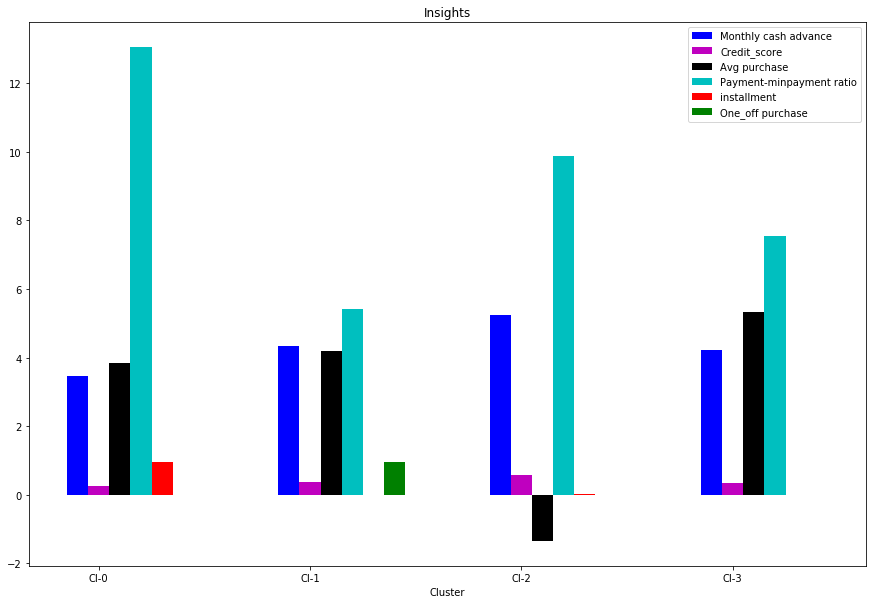

In [66]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

In [67]:
cluster_df_4.Cluster_4.value_counts()/len(cluster_df_4)*100

3    29.206704
0    25.743017
2    23.497207
1    21.553073
Name: Cluster_4, dtype: float64

## ---
** Insights**

# Clusters are clearly distinguishing behavior within customers

---

<big>



- Cluster 3 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 29.2% of the total customer base ***
 

 
- cluster 2 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23.5% of the total customer base ***



- Cluster 1 customers are doing maximum One_Off transactions  and  least payment ratio. *** This group is about 21.5% of the total customer base ***



- Cluster 0 customers are paying dues and are doing maximum installment purchases. *** This group is about 25.7% of the total customer base ***


---



# Findings through clustering is validating Insights dervied from KPI. (as shown above in Insights from KPI
---

In [68]:
# Percentage of each cluster in the total customer base
cluster_df_4.Cluster_4.value_counts()/len(cluster_df_4)*100

3    29.206704
0    25.743017
2    23.497207
1    21.553073
Name: Cluster_4, dtype: float64

# Finding behaviour with 5 Clusters:
---

In [69]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([1, 3, 0, ..., 1, 3, 0])

In [70]:
pd.Series(km_5.labels_).value_counts()

1    2065
3    2060
4    1934
0    1751
2    1140
dtype: int64

Text(0,0.5,'PC_1')

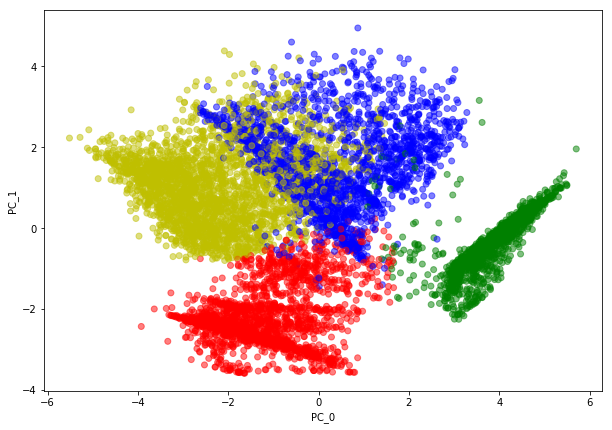

In [71]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'o', 5 : 'k'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(10,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=label_color, cmap='Spectral', alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [72]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [73]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,6.237579,11.575787,21.756140,0.009709,37.231127
Monthly_avg_purchase,63.317382,46.109630,108.593832,0.014289,228.209035
Monthly_cash_advance,45.953287,7.595657,270.657416,183.403846,7.157363
limit_usage,0.356484,0.210549,0.630170,0.574163,0.269055
CASH_ADVANCE_TRX,1.549400,0.162228,10.993860,6.317961,0.248707
payment_minpay,5.314576,14.251850,3.398623,10.027997,9.209681
both_oneoff_installment,0.033695,0.035351,0.637719,0.000000,0.990176
istallment,0.000000,0.964649,0.223684,0.006311,0.000000
one_off,0.966305,0.000000,0.138596,0.002427,0.009824
no_purchases,0.000000,0.000000,0.000000,0.991262,0.000000


# With 5 clusters : 

- we have a group of customers (cluster 2) having highest average purchases but there is Cluster 4 also having highest cash advance & second
highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side


---
 
<big>

*** So we don't have quite distinguishable characteristics with 5 clusters, ***

In [74]:
# Percentage of each cluster in the total customer base
cluster_df_5.Cluster_5.value_counts()/len(cluster_df_5)*100

1    23.072626
3    23.016760
4    21.608939
0    19.564246
2    12.737430
Name: Cluster_5, dtype: float64

# Finding behavior with 6 clusters

In [75]:
km_6=KMeans(n_clusters=6).fit(reduced_cr)
km_6.labels_

array([0, 4, 1, ..., 0, 4, 5])

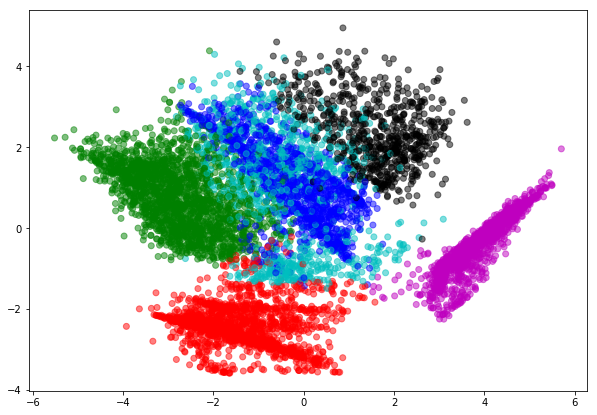

In [76]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(10,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)


In [77]:
cluster_df_6=pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [78]:
six_cluster=cluster_df_6.groupby('Cluster_6')\
.apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,11.615848,7.139331,37.317435,23.657170,0.007299,5.929078
Monthly_avg_purchase,46.228557,72.307009,228.596766,112.998996,0.013217,53.749290
Monthly_cash_advance,4.692217,3.397890,6.685047,236.978401,183.003245,204.970658
limit_usage,0.198798,0.245099,0.269411,0.628012,0.574101,0.605401
CASH_ADVANCE_TRX,0.102808,0.123408,0.226285,9.433048,6.309489,7.646809
payment_minpay,14.664764,6.655641,9.045704,3.307857,10.041642,3.248940
both_oneoff_installment,0.027081,0.069268,0.997350,0.708452,0.000000,0.007092
istallment,0.972919,0.000000,0.000000,0.291548,0.006326,0.000000
one_off,0.000000,0.930732,0.002650,0.000000,0.000000,0.992908
no_purchases,0.000000,0.000000,0.000000,0.000000,0.993674,0.000000


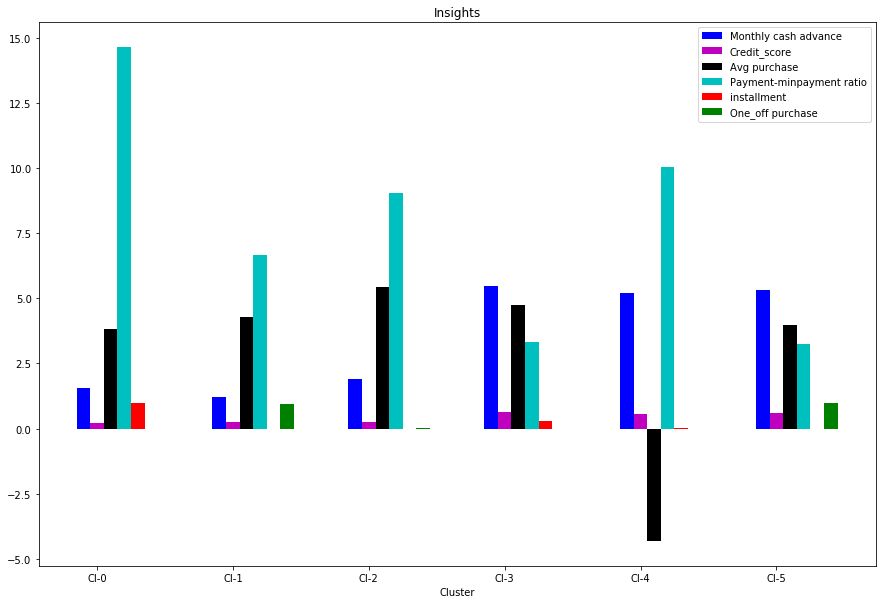

In [79]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['istallment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [80]:
cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=list(six_cluster.loc['limit_usage',:].values)
cash_advance

array([1.5459052 , 1.22315467, 1.8998733 , 5.467969  , 5.20950389,
       5.32286684])

## Insights with  6 clusters

- Here also groups are overlapping .
     - Cl-1 and Cl-5 behaving same 


---


# Checking performance metrics for Kmeans
- I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [81]:
reduced_cr.shape

(8950, 5)

In [82]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n] = calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n] = silhouette_score(reduced_cr,km_score.labels_,  sample_size = 5000)

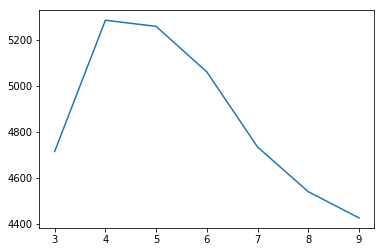

In [83]:
pd.Series(score_c).plot()

In [84]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

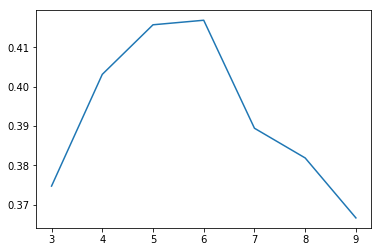

In [85]:
pd.Series(score).plot()

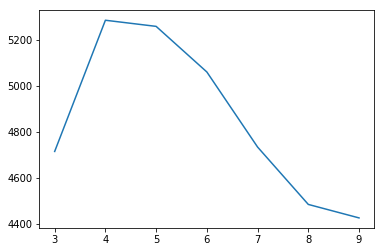

In [86]:
pd.Series(score_c).plot()

## Performance metrics also suggest that  K-means with 4 cluster is able to show distinguished characteristics of each cluster.




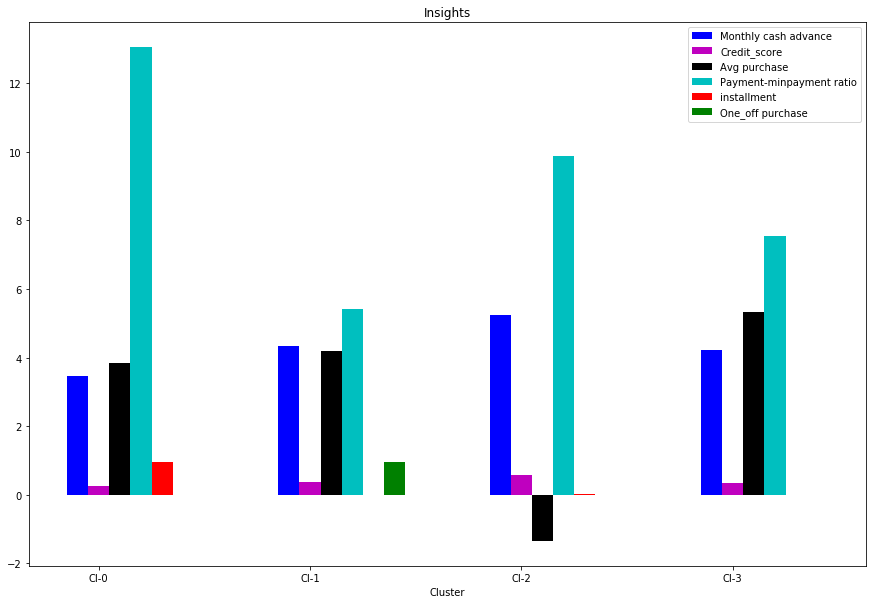

In [87]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

## ---
** Insights with 4 clusters**

# Clusters are clearly distinguishing behavior within customers

---

<big>



- Cluster 3 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 29.2% of the total customer base ***
 

 
- cluster 2 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23.5% of the total customer base ***



- Cluster 1 customers are doing maximum One_Off transactions  and  least payment ratio. *** This group is about 21.5% of the total customer base ***



- Cluster 0 customers are paying dues and are doing maximum installment purchases. *** This group is about 25.7% of the total customer base ***


---



# Marketing Strategy Suggested:

## a. Group 3
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
       
## b. Group 2
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction
   
## c. Group 1
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
   
## d. Group 0
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.
       